In [296]:
#imports :

import pandas as pd # pandas pour la manipulation de données 
import numpy as np # numpy pour certaines operations sur les series
import plotly.express as px # plotly express pour des representations graphiques interactives
import seaborn
import matplotlib.colors as mcolors
from matplotlib.patches import Rectangle
import math
# extra librairies de visionnage
import plotly.graph_objects as go

%matplotlib inline
import matplotlib.pyplot as plt

In [297]:
df = pd.read_csv(f"data/netflix_titles.csv",encoding="utf8",sep=",")
df1 = df.assign(Platform = 'Netflix')
#display(df1.head()) 
df1.to_csv('data/netflix.csv', index=False)

In [298]:
df = pd.read_csv(f"data/amazon_prime_titles.csv",encoding="utf8",sep=",")
df2 = df.assign(Platform = 'Amazon Prime')
#display(df2.head()) 
df2.to_csv('data/amazon.csv', index=False)


In [299]:
df= pd.read_csv(f"data/disney_plus_titles.csv",encoding="utf8",sep=",")
df3 = df.assign(Platform = 'Disney+')
# display(df3.head()) 
df3.to_csv('data/disney.csv', index=False)

In [300]:
# merging three csv files
df = pd.concat(
    map(pd.read_csv, ['data/netflix.csv', 'data/amazon.csv','data/disney.csv']), ignore_index=True)
display(df)
df.to_csv('data/db.csv', index=False)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Platform
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Netflix
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Netflix
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Netflix
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",Netflix
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,Netflix
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19920,s1446,Movie,X-Men Origins: Wolverine,Gavin Hood,"Hugh Jackman, Liev Schreiber, Danny Huston, wi...","United States, United Kingdom","June 4, 2021",2009,PG-13,108 min,"Action-Adventure, Family, Science Fiction",Wolverine unites with legendary X-Men to fight...,Disney+
19921,s1447,Movie,Night at the Museum: Battle of the Smithsonian,Shawn Levy,"Ben Stiller, Amy Adams, Owen Wilson, Hank Azar...","United States, Canada","April 2, 2021",2009,PG,106 min,"Action-Adventure, Comedy, Family",Larry Daley returns to rescue some old friends...,Disney+
19922,s1448,Movie,Eddie the Eagle,Dexter Fletcher,"Tom Costello, Jo Hartley, Keith Allen, Dickon ...","United Kingdom, Germany, United States","December 18, 2020",2016,PG-13,107 min,"Biographical, Comedy, Drama","True story of Eddie Edwards, a British ski-jum...",Disney+
19923,s1449,Movie,Bend It Like Beckham,Gurinder Chadha,"Parminder Nagra, Keira Knightley, Jonathan Rhy...","United Kingdom, Germany, United States","September 18, 2020",2003,PG-13,112 min,"Buddy, Comedy, Coming of Age",Despite the wishes of their traditional famili...,Disney+


In [301]:
df = df.drop(columns=["description","show_id"],errors="ignore")
display(df)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,Platform
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,Netflix
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",Netflix
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",Netflix
3,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV",Netflix
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",Netflix
...,...,...,...,...,...,...,...,...,...,...,...
19920,Movie,X-Men Origins: Wolverine,Gavin Hood,"Hugh Jackman, Liev Schreiber, Danny Huston, wi...","United States, United Kingdom","June 4, 2021",2009,PG-13,108 min,"Action-Adventure, Family, Science Fiction",Disney+
19921,Movie,Night at the Museum: Battle of the Smithsonian,Shawn Levy,"Ben Stiller, Amy Adams, Owen Wilson, Hank Azar...","United States, Canada","April 2, 2021",2009,PG,106 min,"Action-Adventure, Comedy, Family",Disney+
19922,Movie,Eddie the Eagle,Dexter Fletcher,"Tom Costello, Jo Hartley, Keith Allen, Dickon ...","United Kingdom, Germany, United States","December 18, 2020",2016,PG-13,107 min,"Biographical, Comedy, Drama",Disney+
19923,Movie,Bend It Like Beckham,Gurinder Chadha,"Parminder Nagra, Keira Knightley, Jonathan Rhy...","United Kingdom, Germany, United States","September 18, 2020",2003,PG-13,112 min,"Buddy, Comedy, Coming of Age",Disney+


6131 2676 7814 1854 1052 398


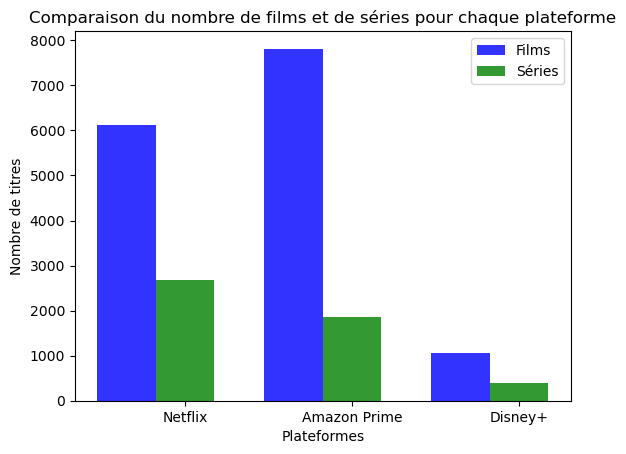

In [302]:

nbrmn = df[(df['type'] == 'Movie') & (df['Platform'] == 'Netflix')].shape[0]
nbrtn = df[(df['type'] == 'TV Show') & (df['Platform'] == 'Netflix')].shape[0]
nbrma = df[(df['type'] == 'Movie') & (df['Platform'] == 'Amazon Prime')].shape[0]
nbrta = df[(df['type'] == 'TV Show') & (df['Platform'] == 'Amazon Prime')].shape[0]
nbrmd = df[(df['type'] == 'Movie') & (df['Platform'] == 'Disney+')].shape[0]
nbrtd = df[(df['type'] == 'TV Show') & (df['Platform'] == 'Disney+')].shape[0]


print(nbrmn, nbrtn, nbrma, nbrta, nbrmd, nbrtd)


labels = ['Netflix', 'Amazon Prime', 'Disney+']
movies = [nbrmn, nbrma, nbrmd]
tv_shows = [nbrtn, nbrta, nbrtd]
x = range(len(labels))

fig, ax = plt.subplots()
bar_width = 0.35
opacity = 0.8

rects1 = ax.bar(x, movies, bar_width,alpha=opacity, color='b',label='Films')

rects2 = ax.bar([xi + bar_width for xi in x], tv_shows, bar_width,alpha=opacity, color='g',label='Séries')

# ajouter les étiquettes et les légendes
ax.set_xlabel('Plateformes')
ax.set_ylabel('Nombre de titres')
ax.set_title('Comparaison du nombre de films et de séries pour chaque plateforme')
ax.set_xticks([xi + bar_width for xi in x])
ax.set_xticklabels(labels)
ax.legend()

plt.show()
#refaire ça avec df1, df2 et df3 pour ensuite juste compter les lignes



Text(0.5, 1.0, 'Diagramme de répartition des catégories sur Netflix')

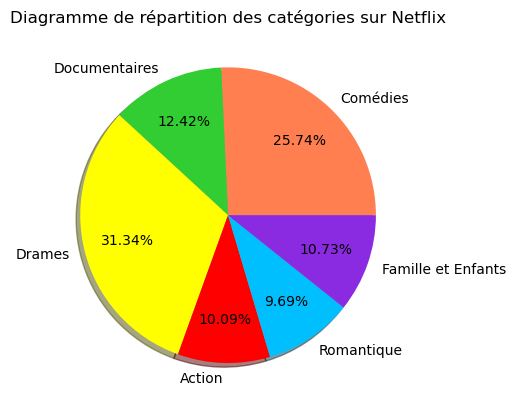

In [303]:
#nombre de comédies
nbr_com_n = df[(df.listed_in.str.contains('Comedies') | df.listed_in.str.contains('Comedy')) & (df['Platform'] == 'Netflix')].shape[0]
nbr_com_a = df[(df.listed_in.str.contains('Comedies') | df.listed_in.str.contains('Comedy')) & (df['Platform'] == 'Amazon Prime')].shape[0]
nbr_com_d = df[(df.listed_in.str.contains('Comedies') | df.listed_in.str.contains('Comedy')) & (df['Platform'] == 'Disney+')].shape[0]

#documentaires
nbr_doc_n = df[(df.listed_in.str.contains('Documentaries') | df.listed_in.str.contains('Docuseries')) & (df['Platform'] == 'Netflix')].shape[0]
nbr_doc_a = df[(df.listed_in.str.contains('Documentary') | df.listed_in.str.contains('Docuseries')) & (df['Platform'] == 'Amazon Prime')].shape[0]
nbr_doc_d = df[(df.listed_in.str.contains('Documentary') | df.listed_in.str.contains('Docuseries')) & (df['Platform'] == 'Disney+')].shape[0]

#drama
nbr_dram_n = df[(df.listed_in.str.contains('Drama')) & (df['Platform'] == 'Netflix')].shape[0]
nbr_dram_a = df[(df.listed_in.str.contains('Drama')) & (df['Platform'] == 'Amazon Prime')].shape[0]
nbr_dram_d = df[(df.listed_in.str.contains('Drama')) & (df['Platform'] == 'Disney+')].shape[0]

#action
nbr_act_n = df[(df.listed_in.str.contains('Action')) & (df['Platform'] == 'Netflix')].shape[0]
nbr_act_a = df[(df.listed_in.str.contains('Action')) & (df['Platform'] == 'Amazon Prime')].shape[0]
nbr_act_d = df[(df.listed_in.str.contains('Action')) & (df['Platform'] == 'Disney+')].shape[0]

#romantique
nbr_rom_n = df[(df.listed_in.str.contains('Romantic') | (df.listed_in.str.contains('Romance'))) & (df['Platform'] == 'Netflix')].shape[0]
nbr_rom_a = df[(df.listed_in.str.contains('Romantic') | (df.listed_in.str.contains('Romance'))) & (df['Platform'] == 'Amazon Prime')].shape[0]
nbr_rom_d = df[(df.listed_in.str.contains('Romantic') | (df.listed_in.str.contains('Romance'))) & (df['Platform'] == 'Disney+')].shape[0]

#Famille et enfants
nbr_fam_n = df[(df.listed_in.str.contains('Family') | (df.listed_in.str.contains('Kids'))) & (df['Platform'] == 'Netflix')].shape[0]
nbr_fam_a = df[(df.listed_in.str.contains('Family') | (df.listed_in.str.contains('Kids'))) & (df['Platform'] == 'Amazon Prime')].shape[0]
nbr_fam_d = df[(df.listed_in.str.contains('Family') | (df.listed_in.str.contains('Kids'))) & (df['Platform'] == 'Disney+')].shape[0]

cat = ['Comédies', 'Documentaires', 'Drames', 'Action','Romantique', 'Famille et Enfants']
palette = ['coral', 'limegreen', 'yellow','red','deepskyblue','blueviolet']
x = [nbr_com_n, nbr_doc_n,nbr_dram_n,nbr_act_n,nbr_rom_n,nbr_fam_n]
plt.pie(x, labels = cat,
           colors = palette,
           autopct = lambda x: str(round(x, 2)) + '%',
           pctdistance = 0.7, labeldistance = 1.1,
           shadow = True,normalize =True)
plt.title('Diagramme de répartition des catégories sur Netflix')

Text(0.5, 1.0, 'Diagramme de répartition des catégories sur Amazon Prime')

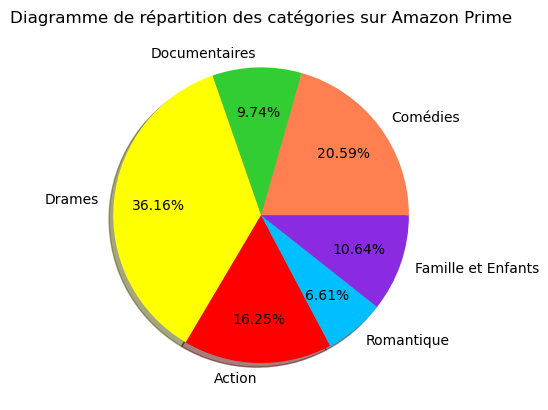

In [304]:
x = [nbr_com_a, nbr_doc_a,nbr_dram_a,nbr_act_a,nbr_rom_a,nbr_fam_a]
plt.pie(x, labels = cat,
           colors =palette,
           autopct = lambda x: str(round(x, 2)) + '%',
           pctdistance = 0.7, labeldistance = 1.1,
           shadow = True,normalize =True)
plt.title('Diagramme de répartition des catégories sur Amazon Prime')

Text(0.5, 1.0, 'Diagramme de répartition des catégories sur Disney+')

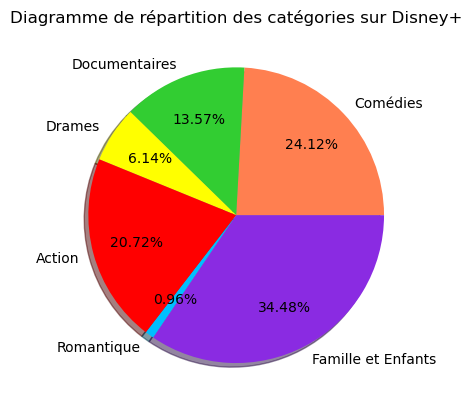

In [305]:
x = [nbr_com_d, nbr_doc_d,nbr_dram_d,nbr_act_d,nbr_rom_d,nbr_fam_d]
plt.pie(x, labels =cat,
           colors = palette,
           autopct = lambda x: str(round(x, 2)) + '%',
           pctdistance = 0.7, labeldistance = 1.1,
           shadow = True,normalize =True)
plt.title('Diagramme de répartition des catégories sur Disney+')

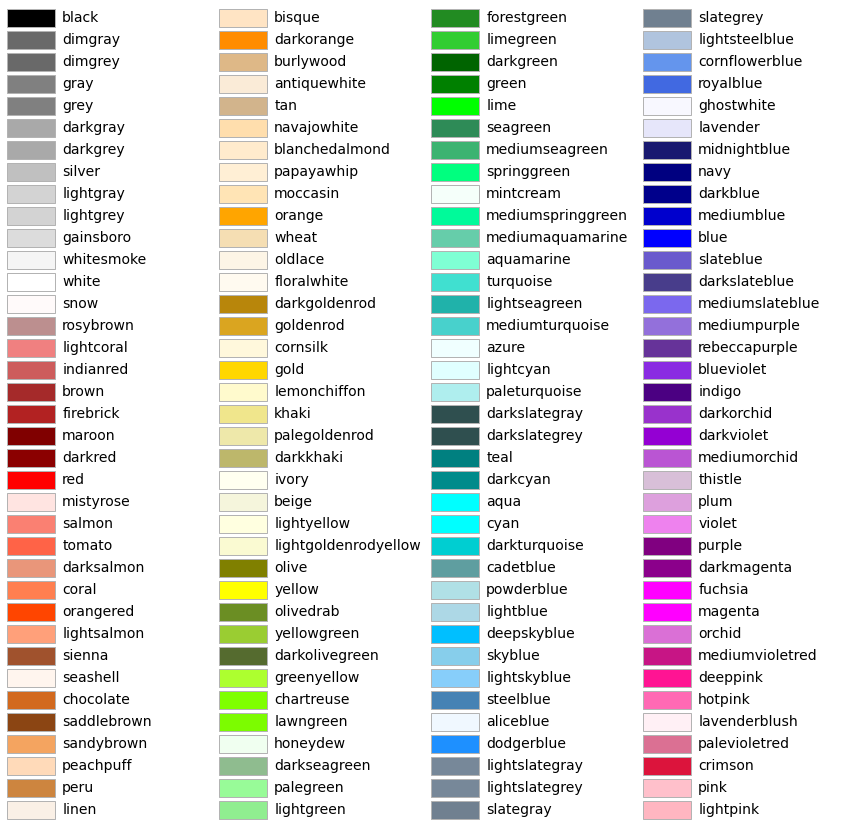

In [306]:
plot_colortable(mcolors.CSS4_COLORS)
plt.show()

In [324]:

def grands_acteurs(plateforme):
    acteurs = ['Meryl Streep', 'Robert De Niro', 'Al Pacino', 'Marlon Brando', 'Denzel Washington', 'Tom Hanks', 'Jack Nicholson', 'Daniel Day-Lewis', 'Anthony Hopkins', 'Cate Blanchett', 'Judi Dench', 'Katharine Hepburn', 'Ingrid Bergman', 'Audrey Hepburn', 'Elizabeth Taylor', 'Grace Kelly', 'Julia Roberts', 'Nicole Kidman', 'Kate Winslet', 'Morgan Freeman', 'Dustin Hoffman', 'Leonardo DiCaprio', 'Johnny Depp', 'Brad Pitt', 'Sean Connery', 'Harrison Ford', 'Clint Eastwood', 'Charlie Chaplin', 'Humphrey Bogart', 'James Stewart', 'Paul Newman', 'Robert Redford', 'Sidney Poitier', 'Bruce Lee', 'Arnold Schwarzenegger', 'Will Smith', 'Samuel L. Jackson', 'Dwayne Johnson', 'Scarlett Johansson', 'Mila Kunis', 'Natalie Portman', 'Jennifer Lawrence', 'Emma Stone', 'Cameron Diaz', 'Anne Hathaway', 'Charlize Theron', 'Angelina Jolie', 'Keira Knightley', 'Maggie Smith', 'Helen Mirren', 'Emma Thompson', 'Meryl Streep', 'Julianne Moore', 'Cate Blanchett', 'Frances McDormand', 'Viola Davis', 'Jessica Chastain', 'Michelle Pfeiffer', 'Gwyneth Paltrow', 'Julia Roberts', 'Kate Winslet', 'Meryl Streep', 'Nicole Kidman', 'Halle Berry', 'Charlize Theron', 'Reese Witherspoon', 'Jennifer Aniston', 'Sandra Bullock', 'Mila Kunis', 'Natalie Portman', 'Scarlett Johansson', 'Anne Hathaway', 'Emma Stone', 'Jennifer Lawrence', 'Cameron Diaz', 'Angelina Jolie', 'Keira Knightley', 'Penélope Cruz', 'Amy Adams', 'Rachel Weisz', 'Julia Roberts', 'Michelle Pfeiffer', 'Helen Mirren', 'Maggie Smith']
    s=0
    for i in range(len(acteurs)):
        s=s + df[(df.cast.str.contains(acteurs[i])) & (df['Platform'] == plateforme)].shape[0]
    return s
grands_acteurs('Netflix')

614

In [321]:

def cast_finder(nom_acteur, plateforme):
    return df[(df.cast.str.contains(nom_acteur)) & (df['Platform'] == plateforme)].title
cast_finder('Tom Hanks', 'Netflix')

329                    Catch Me If You Can
1610                       Angels & Demons
1624                     The Da Vinci Code
6501                           Cloud Atlas
6589    Defying the Nazis: The Sharps' War
7735                          Philadelphia
7949                      Saving Mr. Banks
8461                     The Polar Express
Name: title, dtype: object